In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Remove unwanted column

df.drop(['PassengerId','Name',"Ticket","Cabin"],
        axis = 1,
        inplace = True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
df.select_dtypes(include='object').columns

Index(['Sex', 'Embarked'], dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
enc_sex = LabelEncoder()
enc_emb = LabelEncoder()

df['Sex'] = enc_sex.fit_transform(df['Sex'])
df['Embarked'] = enc_emb.fit_transform(df['Embarked'])

In [11]:
import pickle

In [12]:
with open('sex_encoder.pkl','wb') as f:
    pickle.dump(enc_sex,f)

In [13]:
with open('emb_encoder.pkl','wb') as f:
    pickle.dump(enc_emb,f)

Gender encoding
Male --> 1
Female --> 0
Embarke encoding
S --> 2
C --> 0
Q --> 1

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [15]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [16]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [17]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,
                                                  y,
                                                  test_size=0.3)

In [19]:
X_train.shape,y_train.shape

((623, 7), (623,))

In [20]:
X_test.shape,y_test.shape

((268, 7), (268,))

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [22]:
with open("log_model.pkl",'wb') as f:
    pickle.dump(log_model,f)

In [23]:
y_pred = log_model.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score

In [25]:
print(f"AccuracyScore {accuracy_score(y_test,y_pred)*100}%")
print(f"Precision Score {precision_score(y_test,y_pred)*100}%")
print(f"Recall Score {recall_score(y_test,y_pred)*100}%")
print(f"F1 Score {f1_score(y_test,y_pred)*100}%")

AccuracyScore 79.8507462686567%
Precision Score 75.0%
Recall Score 70.58823529411765%
F1 Score 72.72727272727273%


In [26]:
confusion_matrix(y_test,y_pred)

array([[142,  24],
       [ 30,  72]])

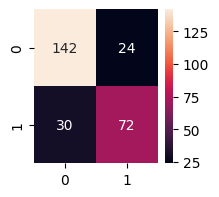

In [27]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(2,2))
sns.heatmap(cm,annot=True,fmt = ".0f")
plt.show()

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       166
           1       0.75      0.71      0.73       102

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



# KNN algorithm

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [30]:
knn_pred = knn.predict(X_test)
knn_pred[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
accuracy_score(y_test,knn_pred)*100

75.74626865671642

In [41]:
confusion_matrix(y_test,knn_pred)

array([[132,  34],
       [ 31,  71]])

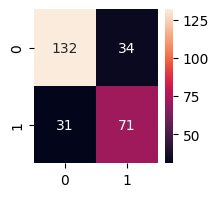

In [40]:
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(y_test,knn_pred),
            annot = True,fmt="0.0f")
plt.show()

# Support Vector Machine

In [42]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [43]:
svm_pred = svm.predict(X_test)
svm_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [44]:
accuracy_score(y_test,svm_pred)

0.7686567164179104